## Annotation Rate: Hit Rate Comparison

The table that reports the hit rates of protein sequences on various protein databases is an important tool because it provides an indication of the coverage of protein sequences in different protein databases. This allows evaluating the effectiveness and exhaustion of the input transcriptome and choosing the most appropriate database for a specific analysis. Additionally, this table can also provide an indication of the specificity of protein sequences based on their ability to match specific protein databases.

This notebook is capable of generating a table with hit percentages of every sequence from two input fasta files (cds and pep) on the three major protein databases. It uses the annotation outputs obtained from both blastp and blastx searches to provide a comprehensive analysis of the hits for each database. This allows the user to evaluate the effectiveness and exhaustiveness of the alignment process.

*Remember:* All of these code cells **must** be executed in a sequential order.

Run this cell to load the required libraries and define the functions.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Useful function for displaying more data
def display_all(df):
    with pd.option_context("display.max_columns", 1000):
        display(df)

# Useful function to get the ID of the sequences
def get_ids_from_fasta(name):

    # Create an empty set
    id_set = set()

    # Open the fasta file
    with open(name, 'r') as f:

        # Read the file line by line
        for line in f.readlines():

            # If the line starts with '>' it is an ID
            if line.startswith('>'):

                # Add the ID (without the '>') to the set
                id_set.add(line.split(' ')[0][1:])

    # Return the set
    return list(id_set)

Now follows the instructions in the comments and fill properly the required fields.

In [ ]:
# Insert the outformat of the output file (only if the outformat is not in the alignment software's output file).
#outformat = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"

# Insert the title of the table
title = "Culex pipiens - Hits Table"

# Insert the path to the output file
path = "../tests/results/" + 'culex_pipiens-longest_orf-hits_table'

# Insert the databases names 
db_names = [
    #'NR',
    #'TrEMBL',
    'Swiss-prot',
]

# Insert the columns names
column_names = [
    'Number of BLASTX results',
    'Number of BLASTP results',
]

# Insert the names (or path) of the fasta files
# follow the order of the column names.
infile = [
    '../tests/data/' + 'culex_pipiens-longest_orf.cds',
    '../tests/data/' + 'culex_pipiens-longest_orf.pep',
]

# Insert the names (or path) of the tsv files (must be ordered by table's columns)
# Also here follow the order of the column names. 
# (first column refers to the first column name (infile), the second column refers to the second column name (infile))
outfiles = [
    #['../tests/data/' + 'culex_pipiens-longest_orf-blastx-nr.tsv', '../tests/data/' + 'culex_pipiens-longest_orf-blastp-nr.tsv'],
    #['../tests/data/' + 'culex_pipiens-longest_orf-blastx-tr.tsv', '../tests/data/' + 'culex_pipiens-longest_orf-blastp-tr.tsv'],
    ['../tests/data/' + 'culex_pipiens-longest_orf-blastx-sp.tsv', '../tests/data/' + 'culex_pipiens-longest_orf-blastp-sp.tsv'],
]

# Insert the outformat of the output file (only if the outformat is not in the alignment software's output file as first row).
#outformat = None
outformat = "qseqid qlen sseqid slen evalue bitscore score length pident stitle"

# Add first row (column names)
table_data = [['Database'] + [x for x in column_names]]

# Calculate the percentage of the sequences hits and store it in the table
for out_file in range(len(outfiles)):

    # Get the current database name
    tmp = [db_names[out_file]]

    # Calculate the hit percentage and store it in the table for each file
    for file_idx in range(len(outfiles[out_file])):

        # If the outformat is not in the alignment software's output file
        if outformat is None:
            
            # Read the tsv file
            df = pd.read_csv(outfiles[out_file][file_idx], sep="\t")
        
        else:

            # Read the tsv file
            df = pd.read_csv(outfiles[out_file][file_idx], sep="\t", names=outformat.split())

        # Get ids of input sequences
        infile_id_count = get_ids_from_fasta(infile[file_idx])

        # Get the number of hits
        hits  = len(df['qseqid'].unique())
        total = len(infile_id_count)

        # Calculate the percentage
        perc = hits / total * 100

        # Store the percentage in the table
        tmp.append(str(hits) + ' (' + str(round(perc, 1)) + ' %)')

    # Store the table row
    table_data.append(tmp)

And finally plot the table!

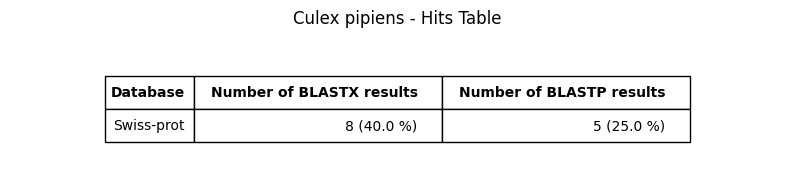

In [16]:
from matplotlib.font_manager import FontProperties

# Adjust the figure size
plt.rcParams["figure.figsize"] = (10,2)

# Plot the table
fig, ax = plt.subplots()

table = ax.table(cellText=table_data, loc='center')

table.set_fontsize(34)
table.scale(1, 2)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
ax.set_title(title)

# Set the column names as bold
for (row, col), cell in table.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))

# Remove axes   
ax.axis('off')

# Save the table
#pd.DataFrame(table_data[1:], columns=table_data[0]).to_csv(path + '.tsv', index=False, sep='\t')

# Save the figure
plt.savefig(path + '.png', bbox_inches = 'tight', dpi=300)
plt.show()